In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
# Set Eager API
tf.enable_eager_execution()
tfe = tf.contrib.eager


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [3]:
# Training Data
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples = len(train_X)

# Parameters
learning_rate = 0.01
display_step = 100
num_steps = 1000

In [4]:
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())

def linear_regression(inputs):
    return inputs * W + b

def mean_square_fn(model_fn,inputs,labels):
    return tf.reduce_sum(tf.pow(model_fn(inputs) - labels,2)) / (2 * n_samples)

In [5]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
grad = tfe.implicit_gradients(mean_square_fn)

Instructions for updating:
Colocations handled automatically by placer.
Initial cost= 10.574885368 W= -0.3140823 b= -0.06386585
Epoch: 0001 cost= 3.259433031 W= -0.009834796 b= -0.020000651
Epoch: 0100 cost= 0.105534770 W= 0.34752372 b= 0.11899287
Epoch: 0200 cost= 0.099365599 W= 0.33655688 b= 0.19674298
Epoch: 0300 cost= 0.094526879 W= 0.3268443 b= 0.26560068
Epoch: 0400 cost= 0.090731680 W= 0.31824255 b= 0.32658318
Epoch: 0500 cost= 0.087754972 W= 0.3106246 b= 0.38059106
Epoch: 0600 cost= 0.085420191 W= 0.30387792 b= 0.4284219
Epoch: 0700 cost= 0.083588958 W= 0.29790288 b= 0.47078228
Epoch: 0800 cost= 0.082152620 W= 0.2926112 b= 0.5082979
Epoch: 0900 cost= 0.081026062 W= 0.28792474 b= 0.5415228
Epoch: 1000 cost= 0.080142438 W= 0.28377423 b= 0.570948


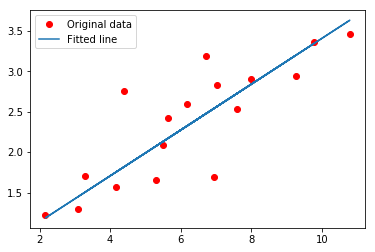

In [6]:
# Initial cost, before optimizing
print("Initial cost= {:.9f}".format(mean_square_fn(linear_regression, train_X, train_Y)),
    "W=", W.numpy(), "b=", b.numpy())

# Training
for step in range(num_steps):
    optimizer.apply_gradients(grad(linear_regression,train_X,train_Y))
    if (step+1) % display_step == 0 or step == 0:
        print("Epoch:", '%04d' % (step + 1), "cost=",
              "{:.9f}".format(mean_square_fn(linear_regression, train_X, train_Y)),
              "W=", W.numpy(), "b=", b.numpy())

# Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(W * train_X + b), label='Fitted line')
plt.legend()
plt.show()